In [ ]:
"""
Logistic Regression Model

Use the banknote authentication dataset and and perform the following activities:

Consider the columns - 'variance', 'skewness', 'curtosis', 'entropy' as predictors and the column 'class' as the target  variable
Build a logistic regression model. 
Calculate the classification accuracy, precision and recall for the model
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_authentication = pd.read_csv("../../datasets/data_banknote_authentication.csv")

In [3]:
bank_authentication.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bank_authentication.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [5]:
bank_authentication.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


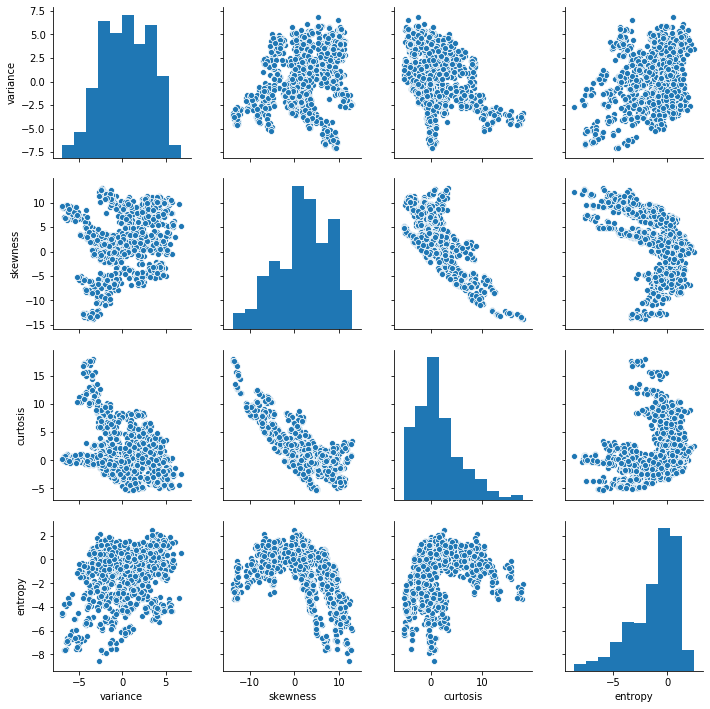

In [6]:
sns.pairplot(bank_authentication[['variance','skewness','curtosis','entropy']])

In [7]:
bank_authentication['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

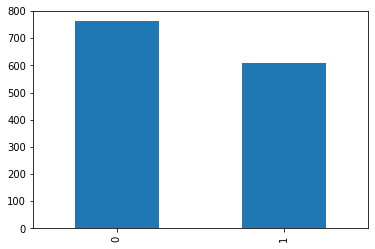

In [8]:
bank_authentication['class'].value_counts().plot.bar()

In [9]:
# predictor/target variables and standardize predictors

x = bank_authentication[["variance","skewness","curtosis","entropy"]]
y = bank_authentication["class"]

from sklearn import preprocessing

standardized_x = preprocessing.scale(x)

In [10]:
# build model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(standardized_x,y,train_size = 0.67, random_state = 0)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# evaluate model using classification report

from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       253
           1       0.96      1.00      0.98       200

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [12]:
# evaluate model using confusion matrix

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Train Confusion Matrix: \n \n", train_confusion_matrix)

print("\n")
    
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Test Confusion Matrix: \n \n", test_confusion_matrix)

Train Confusion Matrix: 
 
 [[494  15]
 [  2 408]]


Test Confusion Matrix: 
 
 [[245   8]
 [  0 200]]


In [13]:
train_accuracy = (train_confusion_matrix[0][0] + train_confusion_matrix[1][1])/ train_confusion_matrix.sum()

print("Train Accuracy:",train_accuracy)

print("\n")

test_accuracy = (test_confusion_matrix[0][0] + test_confusion_matrix[1][1])/ test_confusion_matrix.sum()

print("Test Accuracy:",test_accuracy)

Train Accuracy: 0.9815016322089227


Test Accuracy: 0.9823399558498896
